# Single Frequency Receive Power

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig, Germany

This notebook is part of the paper "$\color{red}{TODO}$" (Karl-Ludwig Besser, Eduard Jorswieck, and Justin Coon).  
If you use any of this work, please cite the above paper.

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. The will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using Shift+Return

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import interact

In [10]:
from single_frequency import rec_power, crit_dist, to_decibel

In [21]:
def rec_power_single_freq(freq, h_tx, h_rx):
    if freq > 1e9:
        _num_steps = 5000
    else:
        _num_steps = 2000
    distance = np.logspace(0, 3, _num_steps)
    crit_distances = crit_dist(freq, h_tx, h_rx)
    
    fig, axs = plt.subplots()
    _lim_power = [-130, -40]
    axs.set_ylim(_lim_power)
    axs.set_xlim([min(distance), max(distance)])
    plot_power = axs.semilogx(distance, np.ones_like(distance))[0]
    plot_dist = axs.vlines(crit_distances, _lim_power[0], _lim_power[1],
                           colors='k', linestyles='dashed', alpha=.2)
    
    def update_plot(rho=1.):
        G_ref = rho**2
        power_rx = rec_power(distance, freq, h_tx, h_rx, G_ref=G_ref)
        power_rx_db = to_decibel(power_rx)
        plot_power.set_ydata(power_rx_db)
    interact(update_plot, rho=(0, 1, .001))

interactive(children=(FloatSlider(value=1.0, description='rho', max=1.0, step=0.001), Output()), _dom_classes=…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
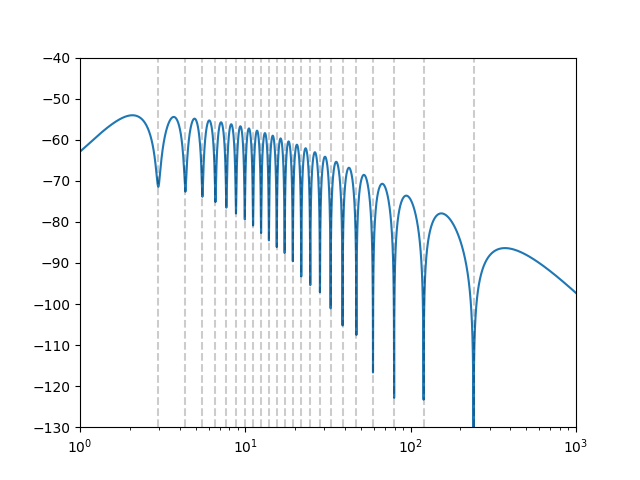

In [22]:
rec_power_single_freq(freq=2.4e9, h_tx=10, h_rx=1.5)